# Loan Status Dataset Generation

In [1]:
from pylab import *
from pyAgrum.lib.notebook import showBN, showInformation

import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.BayesNet('Loan Status')

## Building the Bayesian Network

### Implementing nodes and arcs

In [2]:
# INDEPENDENT ATTRIBUTES
living_area = bn.add(gum.LabelizedVariable("Living Area","c",['Small City','Big City','Village']))
age = bn.add(gum.LabelizedVariable("Age","b",['Young','Adult','Old']))
gender = bn.add(gum.LabelizedVariable("Gender",'d',['Male','Female']))
econ_status = bn.add(gum.LabelizedVariable('Economic Status','m',['Growth','Crisis']))
credit_hist = bn.add(gum.LabelizedVariable('Credit History','l',['Respectful','Disrespectful']))


# DEPENDENT VARIABLES
education = bn.add(gum.LabelizedVariable("Education","a",["Middle School", "High School", "University"]))
income = bn.add(gum.LabelizedVariable('Income','e',['<50k','50-100k','>100k']))
ethnicity = bn.add(gum.LabelizedVariable('Ethnicity','f',['Caucasian','Not Caucasian']))
disc_factor = bn.add(gum.LabelizedVariable('Discriminatory Factor','g',['None','Racism','Misogyny']))
loan_amount = bn.add(gum.LabelizedVariable('Loan Amount','h',['Small','Standard','High']))
credit_score = bn.add(gum.LabelizedVariable('Credit Score','i',['Low','Medium','High']))
loan_status = bn.add(gum.LabelizedVariable('Loan Status','n',['Approved','Not Approved']))

In [3]:
# ADDING ARCS TO THE NETWORK
bn.addArc(living_area,education)
bn.addArc(age,education)
bn.addArc(education,income)
bn.addArc(gender,disc_factor)
bn.addArc(living_area,ethnicity)
bn.addArc(ethnicity,disc_factor)
bn.addArc(living_area,loan_amount)
bn.addArc(income,loan_amount)
bn.addArc(education,credit_score)
bn.addArc(income,credit_score)
bn.addArc(credit_hist,credit_score)
bn.addArc(econ_status,loan_amount)
bn.addArc(loan_amount,loan_status)
bn.addArc(credit_score,loan_status)
bn.addArc(econ_status,loan_status)
bn.addArc(age,disc_factor)
bn.addArc(disc_factor,loan_status)

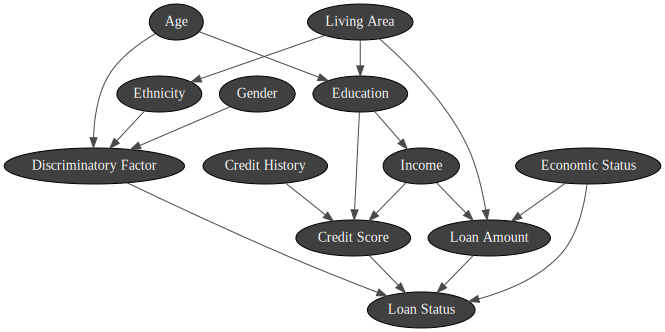

In [4]:
showBN(bn,size=10)

### Independent variables' distributions

In [5]:
bn.cpt(age).fillWith([0.3333,0.3333,0.3333])
bn.cpt("Living Area").fillWith([0.3,0.5,0.2])
bn.cpt(gender).fillWith([0.6,0.4])
bn.cpt(econ_status).fillWith([0.8,0.2])
bn.cpt(credit_hist).fillWith([0.9,0.1])

(gum::Potential<double>@0000023D8BF54CD0) 
  Credit History   |
Respectfu|Disrespec|
---------|---------|
 0.9000  | 0.1000  |

### CPT for dependent attributes

In [6]:
bn.cpt(education)[{'Age': "Young", 'Living Area': "Small City"}] = [0.4, 0.5, 0.1]
bn.cpt(education)[{'Age': "Young", 'Living Area': "Big City"}] = [0.3,0.5,0.2]
bn.cpt(education)[{'Age': "Young", 'Living Area': "Village"}] = [0.6, 0.3, 0.1]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Small City"}] = [0.3, 0.5, 0.2]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Big City"}] = [0.2, 0.5, 0.3]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Village"}] = [0.2, 0.5, 0.3]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Small City"}] = [0.2, 0.55, 0.25]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Big City"}] = [0.6, 0.6, 0.3]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Village"}] = [0.3, 0.5, 0.2]
bn.cpt(education)
# 9x3 = 27

(gum::Potential<double>@0000023D8BF54D30) 
             ||  Education                  |
Living|Age   ||Middle Sc|High Scho|Universit|
------|------||---------|---------|---------|
Small |Young || 0.4000  | 0.5000  | 0.1000  |
Big Ci|Young || 0.3000  | 0.5000  | 0.2000  |
Villag|Young || 0.6000  | 0.3000  | 0.1000  |
Small |Adult || 0.3000  | 0.5000  | 0.2000  |
Big Ci|Adult || 0.2000  | 0.5000  | 0.3000  |
Villag|Adult || 0.2000  | 0.5000  | 0.3000  |
Small |Old   || 0.2000  | 0.5500  | 0.2500  |
Big Ci|Old   || 0.6000  | 0.6000  | 0.3000  |
Villag|Old   || 0.3000  | 0.5000  | 0.2000  |

In [7]:
bn.cpt(income)[{'Education':'Middle School'}] = [0.8,0.1,0.1]
bn.cpt(income)[{'Education':'High School'}] = [0.25,0.5,0.25]
bn.cpt(income)[{'Education':'University'}] = [0.2,0.3,0.5]
bn.cpt(income)
# 9

(gum::Potential<double>@0000023D8BF54D50) 
      ||  Income                     |
Educat||<50k     |50-100k  |>100k    |
------||---------|---------|---------|
Middle|| 0.8000  | 0.1000  | 0.1000  |
High S|| 0.2500  | 0.5000  | 0.2500  |
Univer|| 0.2000  | 0.3000  | 0.5000  |

In [8]:
bn.cpt(ethnicity)[{'Living Area': 'Small City'}] = [0.4,0.6]
bn.cpt(ethnicity)[{'Living Area': 'Big City'}] = [0.7,0.3]
bn.cpt(ethnicity)[{'Living Area': 'Village'}] = [0.49,0.51]
bn.cpt(ethnicity)
# 6

(gum::Potential<double>@0000023D8BF54750) 
      ||  Ethnicity        |
Living||Caucasian|Not Cauca|
------||---------|---------|
Small || 0.4000  | 0.6000  |
Big Ci|| 0.7000  | 0.3000  |
Villag|| 0.4900  | 0.5100  |

In [9]:
bn.cpt(disc_factor)[{'Age': 'Young','Ethnicity':'Caucasian','Gender':'Male'}] = [0.9,0.1,0]
bn.cpt(disc_factor)[{'Age': 'Young','Ethnicity':'Caucasian','Gender':'Female'}] = [0.6,0,0.4]
bn.cpt(disc_factor)[{'Age': 'Young','Ethnicity':'Not Caucasian','Gender':'Male'}] = [0.6,0.4,0]
bn.cpt(disc_factor)[{'Age': 'Young','Ethnicity':'Not Caucasian','Gender':'Female'}] = [0.3,0.4,0.4]
bn.cpt(disc_factor)[{'Age': 'Adult','Ethnicity':'Caucasian','Gender':'Male'}] = [0.7,0.2,0.1]
bn.cpt(disc_factor)[{'Age': 'Adult','Ethnicity':'Caucasian','Gender':'Female'}] = [1,0,0]
bn.cpt(disc_factor)[{'Age': 'Adult','Ethnicity':'Not Caucasian','Gender':'Male'}] = [0.7,0.3,0.]
bn.cpt(disc_factor)[{'Age': 'Adult','Ethnicity':'Not Caucasian','Gender':'Female'}] = [0.5,0.2,0.3]
bn.cpt(disc_factor)[{'Age': 'Old','Ethnicity':'Caucasian','Gender':'Male'}] = [1,0,0]
bn.cpt(disc_factor)[{'Age': 'Old','Ethnicity':'Caucasian','Gender':'Female'}] = [0.8,0,0.2]
bn.cpt(disc_factor)[{'Age': 'Old','Ethnicity':'Not Caucasian','Gender':'Male'}] = [0.8,0.2,0]
bn.cpt(disc_factor)[{'Age': 'Old','Ethnicity':'Not Caucasian','Gender':'Female'}] = [0.6,0.2,0.2]
bn.cpt(disc_factor)
# 4x3x3 = 36

(gum::Potential<double>@0000023D8BF54E30) 
                    ||  Discriminatory Factor      |
Gender|Ethnic|Age   ||None     |Racism   |Misogyny |
------|------|------||---------|---------|---------|
Male  |Caucas|Young || 0.9000  | 0.1000  | 0.0000  |
Female|Caucas|Young || 0.6000  | 0.0000  | 0.4000  |
Male  |Not Ca|Young || 0.6000  | 0.4000  | 0.0000  |
Female|Not Ca|Young || 0.3000  | 0.4000  | 0.4000  |
Male  |Caucas|Adult || 0.7000  | 0.2000  | 0.1000  |
Female|Caucas|Adult || 1.0000  | 0.0000  | 0.0000  |
Male  |Not Ca|Adult || 0.7000  | 0.3000  | 0.0000  |
Female|Not Ca|Adult || 0.5000  | 0.2000  | 0.3000  |
Male  |Caucas|Old   || 1.0000  | 0.0000  | 0.0000  |
Female|Caucas|Old   || 0.8000  | 0.0000  | 0.2000  |
Male  |Not Ca|Old   || 0.8000  | 0.2000  | 0.0000  |
Female|Not Ca|Old   || 0.6000  | 0.2000  | 0.2000  |

In [10]:

bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'<50k','Living Area': "Small City"}] = [0.6,0.3,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'<50k','Living Area': "Big City"}] = [0.3,0.5,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'<50k','Living Area': "Village"}] = [0.7,0.2,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'50-100k','Living Area': "Small City"}] = [0.2,0.6,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'50-100k','Living Area': "Big City"}] = [0.1,0.8,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'50-100k','Living Area': "Village"}] = [0.3,0.5,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'>100k','Living Area': "Small City"}] = [0.1,0.4,0.5]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'>100k','Living Area': "Big City"}] = [0.1,0.15,0.85]
bn.cpt(loan_amount)[{'Economic Status': 'Growth','Income':'>100k','Living Area': "Village"}] = [0.1,0.3,0.6]

bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'<50k','Living Area': "Small City"}] = [0.7,0.2,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'<50k','Living Area': "Big City"}] = [0.4,0.4,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'<50k','Living Area': "Village"}] = [0.8,0.1,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'50-100k','Living Area': "Small City"}] = [0.3,0.5,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'50-100k','Living Area': "Big City"}] = [0.3,0.6,0.1]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'50-100k','Living Area': "Village"}] = [0.4,0.4,0.2]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'>100k','Living Area': "Small City"}] = [0.2,0.4,0.4]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'>100k','Living Area': "Big City"}] = [0.1,0.3,0.7]
bn.cpt(loan_amount)[{'Economic Status': 'Crisis','Income':'>100k','Living Area': "Village"}] = [0.1,0.5,0.4]
bn.cpt(loan_amount)
# 18x3 = 54

(gum::Potential<double>@0000023D8BF55090) 
                    ||  Loan Amount                |
Living|Income|Econom||Small    |Standard |High     |
------|------|------||---------|---------|---------|
Small |<50k  |Growth|| 0.6000  | 0.3000  | 0.1000  |
Big Ci|<50k  |Growth|| 0.3000  | 0.5000  | 0.2000  |
Villag|<50k  |Growth|| 0.7000  | 0.2000  | 0.1000  |
Small |50-100|Growth|| 0.2000  | 0.6000  | 0.2000  |
Big Ci|50-100|Growth|| 0.1000  | 0.8000  | 0.1000  |
Villag|50-100|Growth|| 0.3000  | 0.5000  | 0.2000  |
[...6 more line(s) ...]
Small |50-100|Crisis|| 0.3000  | 0.5000  | 0.2000  |
Big Ci|50-100|Crisis|| 0.3000  | 0.6000  | 0.1000  |
Villag|50-100|Crisis|| 0.4000  | 0.4000  | 0.2000  |
Small |>100k |Crisis|| 0.2000  | 0.4000  | 0.4000  |
Big Ci|>100k |Crisis|| 0.1000  | 0.3000  | 0.7000  |
Villag|>100k |Crisis|| 0.1000  | 0.5000  | 0.4000  |

In [11]:
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'<50k','Education':'Middle School'}] = [0.4,0.4,0.2]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'<50k','Education':'High School'}] = [0.4,0.5,0.1]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'<50k','Education':'University'}] = [0.3,0.4,0.3]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'50-100k','Education':'Middle School'}] = [0.3,0.5,0.2]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'50-100k','Education':'High School'}] = [0.3,0.4,0.3]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'50-100k','Education':'University'}] = [0.2,0.5,0.3]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'>100k','Education':'Middle School'}] = [0.2,0.4,0.4]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'>100k','Education':'High School'}] = [0.1,0.25,0.65]
bn.cpt(credit_score)[{'Credit History': 'Respectful','Income':'>100k','Education':'University'}] = [0,0.3,0.7]

bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'<50k','Education':'Middle School'}] = [0.9,0.1,0]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'<50k','Education':'High School'}] = [0.8,0.2,0]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'<50k','Education':'University'}] = [0.75,0.25,0]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'50-100k','Education':'Middle School'}] = [0.85,0.1,0.05]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'50-100k','Education':'High School'}] = [0.75,0.2,0.05]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'50-100k','Education':'University'}] = [0.7,0.2,0.1]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'>100k','Education':'Middle School'}] = [0.7,0.2,0.1]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'>100k','Education':'High School'}] = [0.6,0.3,0.1]
bn.cpt(credit_score)[{'Credit History': 'Disrespectful','Income':'>100k','Education':'University'}] = [0.4,0.4,0.2]
bn.cpt(credit_score)
# 18x3 = 54

(gum::Potential<double>@0000023D8BF556D0) 
                    ||  Credit Score               |
Educat|Income|Credit||Low      |Medium   |High     |
------|------|------||---------|---------|---------|
Middle|<50k  |Respec|| 0.4000  | 0.4000  | 0.2000  |
High S|<50k  |Respec|| 0.4000  | 0.5000  | 0.1000  |
Univer|<50k  |Respec|| 0.3000  | 0.4000  | 0.3000  |
Middle|50-100|Respec|| 0.3000  | 0.5000  | 0.2000  |
High S|50-100|Respec|| 0.3000  | 0.4000  | 0.3000  |
Univer|50-100|Respec|| 0.2000  | 0.5000  | 0.3000  |
[...6 more line(s) ...]
Middle|50-100|Disres|| 0.8500  | 0.1000  | 0.0500  |
High S|50-100|Disres|| 0.7500  | 0.2000  | 0.0500  |
Univer|50-100|Disres|| 0.7000  | 0.2000  | 0.1000  |
Middle|>100k |Disres|| 0.7000  | 0.2000  | 0.1000  |
High S|>100k |Disres|| 0.6000  | 0.3000  | 0.1000  |
Univer|>100k |Disres|| 0.4000  | 0.4000  | 0.2000  |

In [12]:
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.4,0.6]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.9,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.8,0.2]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.75,0.25]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Small'}] = [1,0]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.9,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'High'}] = [0.9,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.8,0.2]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.7,0.3]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.65,0.35]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Small'}] = [0.9,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.8,0.2]
bn.cpt(loan_status)[{'Discriminatory Factor': 'None','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'High'}] = [0.8,0.2]

bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.8,0.2]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.7,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.6,0.4]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Small'}] = [0.85,0.15]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.75,0.25]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'High'}] = [0.65,0.35]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.4,0.6]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Small'}] = [0.65,0.35]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.6,0.4]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Racism','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'High'}] = [0.4,0.6]

bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.8,0.2]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.7,0.1]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.6,0.4]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Small'}] = [0.85,0.15]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.75,0.25]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Growth','Credit Score':'High', 'Loan Amount': 'High'}] = [0.65,0.35]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Small'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'Standard'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Low', 'Loan Amount': 'High'}] = [0.1,0.9]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Small'}] = [0.4,0.6]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'Standard'}] = [0.3,0.7]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'Medium', 'Loan Amount': 'High'}] = [0.2,0.8]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Small'}] = [0.65,0.35]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'Standard'}] = [0.6,0.4]
bn.cpt(loan_status)[{'Discriminatory Factor': 'Misogyny','Economic Status': 'Crisis','Credit Score':'High', 'Loan Amount': 'High'}] = [0.4,0.6]


# 18x3x2 = 108

In [13]:
bn.cpt(loan_status)

(gum::Potential<double>@0000023D8BF54FD0) 
                           ||  Loan Status      |
Loan A|Credit|Econom|Discri||Approved |Not Appro|
------|------|------|------||---------|---------|
Small |Low   |Growth|None  || 0.4000  | 0.6000  |
Standa|Low   |Growth|None  || 0.3000  | 0.7000  |
High  |Low   |Growth|None  || 0.2000  | 0.8000  |
Small |Medium|Growth|None  || 0.9000  | 0.1000  |
Standa|Medium|Growth|None  || 0.8000  | 0.2000  |
High  |Medium|Growth|None  || 0.7500  | 0.2500  |
[...42 more line(s) ...]
Small |Medium|Crisis|Misogy|| 0.4000  | 0.6000  |
Standa|Medium|Crisis|Misogy|| 0.3000  | 0.7000  |
High  |Medium|Crisis|Misogy|| 0.2000  | 0.8000  |
Small |High  |Crisis|Misogy|| 0.6500  | 0.3500  |
Standa|High  |Crisis|Misogy|| 0.6000  | 0.4000  |
High  |High  |Crisis|Misogy|| 0.4000  | 0.6000  |

240 parameters

In [14]:
gum.generateCSV(bn,"full_dataset.csv",10000,with_labels=True)

-129023.86641801796